## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [84]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [85]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'E:\Malaria-Detection-master\Dataset\Train'
valid_path = 'E:\Malaria-Detection-master\Dataset\Train/Test'


In [86]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [87]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [88]:
  # useful for getting number of output classes
folders = 2

In [89]:
folders

2

In [90]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [91]:
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [92]:

# view the structure of the model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [93]:
from tensorflow.keras.layers import MaxPooling2D

In [94]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 50176)             0         
__________

In [95]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [96]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [97]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('E:\Malaria-Detection-master\Dataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [98]:
training_set

In [99]:
test_set = test_datagen.flow_from_directory('E:\Malaria-Detection-master\Dataset\Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [100]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
13/13 [==============================] - 40s 3s/step - loss: 2.0716 - acc: 0.4784 - val_loss: 0.6529 - val_acc: 0.6791
Epoch 2/30
13/13 [==============================] - 19s 1s/step - loss: 0.7016 - acc: 0.5361 - val_loss: 0.6838 - val_acc: 0.6194
Epoch 3/30
13/13 [==============================] - 19s 1s/step - loss: 0.6490 - acc: 0.6635 - val_loss: 0.7002 - val_acc: 0.4030
Epoch 4/30
13/13 [==============================] - 19s 1s/step - loss: 0.5754 - acc: 0.6995 - val_loss: 0.7590 - val_acc: 0.3881
Epoch 5/30
13/13 [==============================] - 20s 2s/step - loss: 0.5400 - acc: 0.7139 - val_loss: 0.9514 - val_acc: 0.6791
Epoch 6/30
13/13 [==============================] - 20s 2s/step - loss: 0.6187 - acc: 0.6298 - val_loss: 0.8403 - val_acc: 0.3657
Epoch 7/30
13/13 [==============================] - 20s 2s/step - loss: 0.5371 - acc: 0.7019 - val_loss: 0.8140 - val_acc: 0.4179
Epoch 8/30
13/13 [==============================] - 20s 2s/step - loss: 0.5445 - acc: 0.68

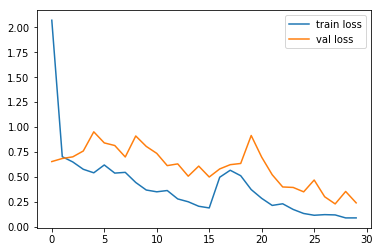

KeyError: 'accuracy'

<Figure size 432x288 with 0 Axes>

In [102]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [103]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [104]:

y_pred = model.predict(test_set)


In [105]:
y_pred

array([[4.01548862e-01, 5.98451138e-01],
       [5.29528409e-02, 9.47047114e-01],
       [5.18721938e-02, 9.48127806e-01],
       [9.62122560e-01, 3.78774814e-02],
       [9.99996901e-01, 3.13919145e-06],
       [1.96894988e-01, 8.03104937e-01],
       [9.97573078e-01, 2.42692325e-03],
       [9.99993443e-01, 6.60478554e-06],
       [8.99750531e-01, 1.00249484e-01],
       [3.68661284e-02, 9.63133872e-01],
       [6.71551645e-01, 3.28448385e-01],
       [1.17394790e-01, 8.82605195e-01],
       [1.00000000e+00, 2.92967588e-08],
       [9.97458518e-01, 2.54152692e-03],
       [9.97526109e-01, 2.47394433e-03],
       [9.99934196e-01, 6.58296703e-05],
       [4.33222093e-02, 9.56677794e-01],
       [9.99999762e-01, 2.11819554e-07],
       [9.99828339e-01, 1.71584456e-04],
       [8.94746304e-01, 1.05253704e-01],
       [6.16903789e-02, 9.38309610e-01],
       [7.43396059e-02, 9.25660312e-01],
       [7.18925893e-02, 9.28107440e-01],
       [9.94081676e-01, 5.91829699e-03],
       [9.999991

In [106]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [107]:
y_pred

array([1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1], dtype=int64)

In [108]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [22]:
model=load_model('model_vgg19.h5')